# reading the files

In [34]:
import pickle
import pandas as pd
X = pd.read_pickle('trainX.pickle')
y = pd.read_pickle('trainY.pickle')

In [35]:
print(X.shape)
print(y.shape)

(60000, 28, 28)
(60000,)


In [36]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation
from keras import backend as K

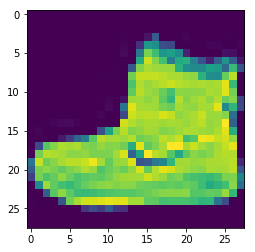

(28, 28)


In [37]:
#Plotting the first image and checking the size of the images
import matplotlib.pyplot as plt
%matplotlib inline

img = X[0]
plt.imshow(img)
plt.show()
print(img.shape)

In [38]:
img_rows,img_cols=28,28

# Preprocessing

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
X_test.shape

(12000, 28, 28)

In [41]:
X_train=X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
input_shape=(img_rows,img_cols,1)

In [42]:
X_train = X_train.astype('float32')
X_train /= 255
X_test=X_test.astype('float32')
X_test/=255

In [43]:
batch_size=120
num_classes=10
epochs=25

In [44]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [45]:
print('x_train shape ', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape  (48000, 28, 28, 1)
48000 train samples
12000 test samples


In [46]:
X_train=X_train.reshape(48000,784)
X_test=X_test.reshape(12000,784)

# Building the first model

In [47]:
model = Sequential()
model.add(Dense(500,input_dim=784),)
model.add(Activation('relu'))
# model.add(Dropout(0.4))
model.add(Dense(300))
model.add(Activation('relu'))
# model.add(Dropout(0.4))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_4 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 300)               150300    
_________________________________________________________________
activation_5 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                3010      
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 545,810
Trainable params: 545,810
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,y_test))
score=model.evaluate(X_test,y_test,verbose=0)
print("Test loss:",score[0])
print("Test accuracy:",score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 9s 183us/step - loss: 0.5902 - acc: 0.7842 - val_loss: 0.4047 - val_acc: 0.8557
Epoch 2/25
48000/48000 [==============================] - 8s 177us/step - loss: 0.4018 - acc: 0.8509 - val_loss: 0.3810 - val_acc: 0.8616
Epoch 3/25
48000/48000 [==============================] - 9s 178us/step - loss: 0.3530 - acc: 0.8694 - val_loss: 0.3338 - val_acc: 0.8787
Epoch 4/25
48000/48000 [==============================] - 9s 179us/step - loss: 0.3239 - acc: 0.8796 - val_loss: 0.3375 - val_acc: 0.8722
Epoch 5/25
48000/48000 [==============================] - 9s 179us/step - loss: 0.3022 - acc: 0.8859 - val_loss: 0.3295 - val_acc: 0.8781
Epoch 6/25
48000/48000 [==============================] - 9s 180us/step - loss: 0.2835 - acc: 0.8945 - val_loss: 0.3131 - val_acc: 0.8849
Epoch 7/25
48000/48000 [==============================] - 9s 180us/step - loss: 0.2696 - acc: 0.8984 - val_loss: 0.3037 - 

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
X_train=X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
input_shape=(img_rows,img_cols,1)

In [51]:
X_train = X_train.astype('float32')
X_train /= 255
X_test=X_test.astype('float32')
X_test/=255

In [52]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [53]:
print('x_train shape ', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape  (48000, 28, 28, 1)
48000 train samples
12000 test samples


In [54]:
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

# Building Cnn

In [55]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               147584    
__________

In [57]:
model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,y_test))
score=model.evaluate(X_test,y_test,verbose=0)
print("Test loss:",score[0])
print("Test accuracy:",score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 49s 1ms/step - loss: 0.5253 - acc: 0.8091 - val_loss: 0.3683 - val_acc: 0.8688
Epoch 2/25
48000/48000 [==============================] - 50s 1ms/step - loss: 0.3334 - acc: 0.8785 - val_loss: 0.3093 - val_acc: 0.8882
Epoch 3/25
48000/48000 [==============================] - 55s 1ms/step - loss: 0.2803 - acc: 0.8984 - val_loss: 0.2997 - val_acc: 0.8901
Epoch 4/25
48000/48000 [==============================] - 54s 1ms/step - loss: 0.2484 - acc: 0.9082 - val_loss: 0.2816 - val_acc: 0.8963
Epoch 5/25
48000/48000 [==============================] - 53s 1ms/step - loss: 0.2219 - acc: 0.9180 - val_loss: 0.2690 - val_acc: 0.9004
Epoch 6/25
48000/48000 [==============================] - 50s 1ms/step - loss: 0.1983 - acc: 0.9272 - val_loss: 0.2559 - val_acc: 0.9081
Epoch 7/25
48000/48000 [==============================] - 55s 1ms/step - loss: 0.1818 - acc: 0.9323 - val_loss: 0.2771 - val_acc

In [58]:
print("Test loss:",score[0])
print("Test accuracy:",score[1])

Test loss: 0.5045793931282436
Test accuracy: 0.9076666666666666


In [59]:
test=pd.read_pickle("testX.pickle")

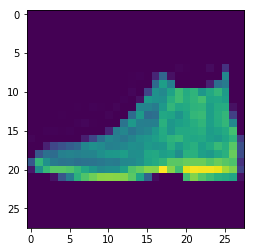

In [60]:
plt.imshow(test[0])
plt.show()

In [62]:
X_test=test
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
X_test=X_test.astype('float32')
X_test/=255

In [63]:
X_test.shape

(10000, 28, 28, 1)

In [64]:
predictions = model.predict_classes([X_test])
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [65]:
len(predictions)

10000

In [67]:
import numpy as np
np.unique(predictions)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [69]:
file=open("results.pickle","wb")
pickle.dump(predictions, file)

In [70]:
t=pd.read_pickle("results.pickle")

In [72]:
print(len(t))
print(len(predictions))

10000
10000
